# Course 3: Sentiment Analysis using Naive Bayes
In this tutorial you'll learn how to build a sentiment analysis model using Naive Bayes:

* Train a naive bayes model on a sentiment analysis task
* Test using your model
* Compute ratios of positive words to negative words
* Error analysis
* Predict on your own text

## Table of Contents

- [Importing Functions and Data](#0)
- [1 - Process the Data](#1)
- [2 - Train your Model using Naive Bayes](#2)
- [3 - Test your Naive Bayes](#3)
- [4 - Filter words by Ratio of Positive to Negative Counts](#4)
- [5 - Error Analysis](#5)
- [6 - Predict with your own Text](#6)

<a name='0'></a>
## Import Libraries and Data

In [1]:
import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd
nltk.download()
nltk.download('stopwords')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('/content/IMDB.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Prepare the Data


* Train set 80% and test set 20%.


In [3]:
from sklearn.model_selection import train_test_split

# Encode labels: pos=1, neg=0
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data
train_x, test_x, train_y, test_y = train_test_split(
    df['review'], df['label'], test_size=0.2, random_state=42
)

# Convert to NumPy arrays
train_x = np.array(train_x.tolist())
test_x = np.array(test_x.tolist())
train_y = np.array(train_y).reshape(-1, 1)
test_y = np.array(test_y).reshape(-1, 1)

print("Train X shape:", train_x.shape)
print("Test X shape:", test_x.shape)


print("Train Y shape:", train_y.shape)
print("Test Y shape:", test_y.shape)


Train X shape: (39999,)
Test X shape: (10000,)
Train Y shape: (39999, 1)
Test Y shape: (10000, 1)


In [4]:
train_x

array(['I haven\'t seen this film since it came out in the mid 70s, but I do recall it as being a very realistic portrayal of the music business ( right up there with Paul Simons "One Trick Pony " ..another vastly underrated film IMO )<br /><br />Harvey Keitel does an excellent job as a producer caught between the music he believes in , and the commercial "tripe" the record company "suits" want him to work with.<br /><br />Since I spent my entire career in the music business as a composer /arranger /producer, I can really vouch for the verisimilitude this film possesses. <br /><br />If it should ever come out on DVD uncut, I\'d buy it!',
       "I recently rented this movie as part of a nostalgic phase I'm going through. I was born in 1980, and so film from mid-80s to mid-90s has quite an important place in my growing up.<br /><br />This particular movie was one of my favourites, and so I was thrilled when it became available in the UK. It hasn't become worse with time, it is still a g

In [5]:
train_y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

* Create the function for processing the string/text:
    - tokenization.
    - remove stop words.
    - apply stemming.  

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import nltk


nltk.download('stopwords')

# Preprocessing function
def process_text(text):
    """Clean and preprocess IMDB review text."""

    # Lowercase
    text = text.lower()

    # Remove hyperlinks
    text = re.sub(r'https?://\S+', '', text)

    # Remove HTML tags (like <br />)
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(text)

    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    cleaned = [
        stemmer.stem(word)
        for word in tokens
        if word not in stop_words and word.isalpha()
    ]

    return cleaned

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
process_text(train_x[100])

['spoiler',
 'film',
 'noth',
 'could',
 'written',
 'could',
 'make',
 'wors',
 'dictionari',
 'definit',
 'pueril',
 'read',
 'sex',
 'live',
 'potato',
 'men',
 'unless',
 'like',
 'dog',
 'poo',
 'mucou',
 'case',
 'film',
 'see',
 'johnni',
 'vega',
 'et',
 'think']

In [8]:
train_x_clean = [' '.join(process_text(text)) for text in train_x]
test_x_clean = [' '.join(process_text(text)) for text in test_x]

* Create the frequency dictionary function.  

In [9]:
import numpy as np

def build_freqs(texts, labels):
    """
    Inputs:
        texts  - a list/array of review texts
        labels - a 2D numpy array of labels (0 or 1)
    Output:
        freqs  - dictionary of (word, label) → frequency
    """
    # Flatten labels to 1D list
    labels_list = np.squeeze(labels).tolist()

    freqs = {}

    # Loop through each (label, text) pair
    for y, text in zip(labels_list, texts):
        for word in process_text(text):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1

    return freqs


In [10]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

print("Type of freqs:", type(freqs))
print("Number of (word, label) pairs:", len(freqs))

Type of freqs: <class 'dict'>
Number of (word, label) pairs: 184828


### Process Text
The given function 'process_text' tokenizes the sentence into individual words, removes stop words and applies stemming.

In [11]:
# test the function below
print('Original IMDB review:\n', train_x[0])
print('\nProcessed version of the review:\n', process_text(train_x[0]))

Original IMDB review:
 I haven't seen this film since it came out in the mid 70s, but I do recall it as being a very realistic portrayal of the music business ( right up there with Paul Simons "One Trick Pony " ..another vastly underrated film IMO )<br /><br />Harvey Keitel does an excellent job as a producer caught between the music he believes in , and the commercial "tripe" the record company "suits" want him to work with.<br /><br />Since I spent my entire career in the music business as a composer /arranger /producer, I can really vouch for the verisimilitude this film possesses. <br /><br />If it should ever come out on DVD uncut, I'd buy it!

Processed version of the review:
 ['havent', 'seen', 'film', 'sinc', 'came', 'mid', 'recal', 'realist', 'portray', 'music', 'busi', 'right', 'paul', 'simon', 'one', 'trick', 'poni', 'anoth', 'vastli', 'underr', 'film', 'imo', 'harvey', 'keitel', 'excel', 'job', 'produc', 'caught', 'music', 'believ', 'commerci', 'tripe', 'record', 'compani',

<a name='2'></a>
## 2 - Train your Model using Naive Bayes

Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.

#### So how do you train a Naive Bayes classifier?
- The first part of training a naive bayes classifier is to identify the number of classes that you have.
- You will create a probability for each class.
$P(D_{pos})$ is the probability that the document is positive.
$P(D_{neg})$ is the probability that the document is negative.
Use the formulas as follows and store the values in a dictionary:

$$P(D_{pos}) = \frac{D_{pos}}{D}\tag{1}$$

$$P(D_{neg}) = \frac{D_{neg}}{D}\tag{2}$$

Where $D$ is the total number of documents, or tweets in this case, $D_{pos}$ is the total number of positive tweets and $D_{neg}$ is the total number of negative tweets.

#### Prior and Logprior

The prior probability represents the underlying probability in the target population that a tweet is positive versus negative.  In other words, if we had no specific information and blindly picked a tweet out of the population set, what is the probability that it will be positive versus that it will be negative? That is the "prior".

The prior is the ratio of the probabilities $\frac{P(D_{pos})}{P(D_{neg})}$.
We can take the log of the prior to rescale it, and we'll call this the logprior

$$\text{logprior} = log \left( \frac{P(D_{pos})}{P(D_{neg})} \right) = log \left( \frac{D_{pos}}{D_{neg}} \right)$$.

Note that $log(\frac{A}{B})$ is the same as $log(A) - log(B)$.  So the logprior can also be calculated as the difference between two logs:

$$\text{logprior} = \log (P(D_{pos})) - \log (P(D_{neg})) = \log (D_{pos}) - \log (D_{neg})\tag{3}$$

#### Positive and Negative Probability of a Word
To compute the positive probability and the negative probability for a specific word in the vocabulary, we'll use the following inputs:

- $freq_{pos}$ and $freq_{neg}$ are the frequencies of that specific word in the positive or negative class. In other words, the positive frequency of a word is the number of times the word is counted with the label of 1.
- $N_{pos}$ and $N_{neg}$ are the total number of positive and negative words for all documents (for all tweets), respectively.
- $V$ is the number of unique words in the entire set of documents, for all classes, whether positive or negative.

We'll use these to compute the positive and negative probability for a specific word using this formula:

$$ P(W_{pos}) = \frac{freq_{pos} + 1}{N_{pos} + V}\tag{4} $$
$$ P(W_{neg}) = \frac{freq_{neg} + 1}{N_{neg} + V}\tag{5} $$

Notice that we add the "+1" in the numerator for additive smoothing.  This [wiki article](https://en.wikipedia.org/wiki/Additive_smoothing) explains more about additive smoothing.

#### Log likelihood
To compute the loglikelihood of that very same word, we can implement the following equations:

$$\text{loglikelihood} = \log \left(\frac{P(W_{pos})}{P(W_{neg})} \right)\tag{6}$$

In [12]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Inputs:
        freqs: dictionary from (word, label)
        train_x: a list of sentences
        train_y: a list of labels (0,1)
    Outputs:
        logprior: the log prior
        loglikelihood: the log likelihood of you Naive bayes equation
    '''
    loglikelihood = {}
    logprior = 0

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = V_pos=V_neg=0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]
            V_pos += 1
        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]
            V_neg += 1
    # Calculate D, the number of documents
    D = train_y.shape[0]

    # Calculate D_pos, the number of positive documents
    D_pos = train_y[train_y == 1].shape[0]

    # Calculate D_neg, the number of negative documents
    D_neg = train_y[train_y == 0].shape[0]

    # Calculate logprior
    logprior = np.log(D_pos / D) - np.log(D_neg / D)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word, 1), 0)
        freq_neg = freqs.get((word, 0), 0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)

    return logprior, loglikelihood

In [13]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

-0.0017500441977420511
149527


<a name='3'></a>
## 3 - Test your Naive Bayes

Now that we have the `logprior` and `loglikelihood`, we can test the naive bayes function by making predicting on some text!

<a name='ex-3'></a>
### Exercise 3 - naive_bayes_predict
Implement `naive_bayes_predict`.

**Instructions**:
Implement the `naive_bayes_predict` function to make predictions on text.
* The function takes in the `text`, `logprior`, `loglikelihood`.
* It returns the probability that the review belongs to the positive or negative class.
* For each review, sum up loglikelihoods of each word in the review.
* Also add the logprior to this sum to get the predicted sentiment of that review.

$$ p = logprior + \sum_i^N (loglikelihood_i)$$

#### Note
Note we calculate the prior from the training data, and that the training data is evenly split between positive and negative labels (4000 positive and 4000 negative reviews).  This means that the ratio of positive to negative 1, and the logprior is 0.

The value of 0.0 means that when we add the logprior to the log likelihood, we're just adding zero to the log likelihood.  However, please remember to include the logprior, because whenever the data is not perfectly balanced, the logprior will be a non-zero value.

In [14]:
def naive_bayes_predict(sentence, logprior, loglikelihood):
    '''
    Inputs:
        sentence: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Outputs:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    # process the sentence to get a list of words
    word_l = process_text(sentence)
    # initialize probability to zero
    p = 0
    # add the logprior
    p += logprior
    for word in word_l:
        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]
    return p

In [15]:
my_review = 'The performances were outstanding and the story kept me hooked until the very end.'
p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 2.6758019020181307


In [16]:
my_review = 'The plot was a mess and the acting felt forced and unnatural.'
p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is -3.9698196122782514


In [25]:
# Clean the test data
test_x_clean = [' '.join(process_text(text)) for text in test_x]

def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    y_hats = []

    for x in test_x:
        p = naive_bayes_predict(x, logprior, loglikelihood)
        y_hat = 1 if p > 0 else 0
        y_hats.append(y_hat)

    return np.array(y_hats)




y_pred_nb = test_naive_bayes(test_x_clean, test_y, logprior, loglikelihood)

y_true_nb = test_y.flatten()


from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true_nb, y_pred_nb)

print("Naive Bayes accuracy = %.4f" % acc)


Naive Bayes accuracy = 0.8466


In [26]:
# Test ambiguous (neutral) IMDB-style reviews with Naive Bayes
ambiguous_reviews = [
    "The movie had some good moments, but overall it felt flat.",
    "I liked the idea, but the execution could have been better.",
    "Not the best film I've seen, but not the worst either.",
    "Some scenes were beautiful, but I couldn't connect with the story.",
    "It started strong, but the ending ruined it for me."
]

for review in ambiguous_reviews:
    prediction_score = naive_bayes_predict(review, logprior, loglikelihood)
    sentiment = "Positive" if prediction_score > 0 else "Negative"
    print(f"{review} -> Score: {prediction_score:.6f} -> Predicted Sentiment: {sentiment}")


The movie had some good moments, but overall it felt flat. -> Score: -1.289098 -> Predicted Sentiment: Negative
I liked the idea, but the execution could have been better. -> Score: -1.712552 -> Predicted Sentiment: Negative
Not the best film I've seen, but not the worst either. -> Score: -2.299953 -> Predicted Sentiment: Negative
Some scenes were beautiful, but I couldn't connect with the story. -> Score: 0.239229 -> Predicted Sentiment: Positive
It started strong, but the ending ruined it for me. -> Score: -0.217943 -> Predicted Sentiment: Negative


<a name='4'></a>
## 4 - Filter words by Ratio of Positive to Negative Counts

- Some words have more positive counts than others, and can be considered "more positive".  Likewise, some words can be considered more negative than others.
- One way for us to define the level of positiveness or negativeness, without calculating the log likelihood, is to compare the positive to negative frequency of the word.
    - Note that we can also use the log likelihood calculations to compare relative positivity or negativity of words.
- We can calculate the ratio of positive to negative frequencies of a word.
- Once we're able to calculate these ratios, we can also filter a subset of words that have a minimum ratio of positivity / negativity or higher.
- Similarly, we can also filter a subset of words that have a maximum ratio of positivity / negativity or lower (words that are at least as negative, or even more negative than a given threshold).


In [27]:
def get_ratio(freqs, word):
    '''
    Input:
        freqs: dictionary containing the words

    Output: a dictionary with keys 'positive', 'negative', and 'ratio'.
        Example: {'positive': 10, 'negative': 20, 'ratio': 0.5}
    '''
    pos_neg_ratio = {'positive': 0, 'negative': 0, 'ratio': 0.0}

    # use lookup() to find positive counts for the word (denoted by the integer 1)
    pos_neg_ratio['positive'] = check_freq(freqs, word, 1)

    # use lookup() to find negative counts for the word (denoted by integer 0)
    pos_neg_ratio['negative'] = check_freq(freqs, word, 0)

    # calculate the ratio of positive to negative counts for the word
    pos_neg_ratio['ratio'] = (pos_neg_ratio['positive'] + 1) / (pos_neg_ratio['negative'] + 1)

    return pos_neg_ratio

In [28]:
def check_freq(freqs, word, label):

    return freqs.get((word, label), 0)

get_ratio(freqs, 'good')

{'positive': 11666, 'negative': 11530, 'ratio': 1.0117942936432227}

In [29]:
get_ratio(freqs, 'happi')

{'positive': 1034, 'negative': 582, 'ratio': 1.7753001715265866}

<a name='5'></a>
## 5 - Predict with your own text

In [30]:
#my_text = "The story was powerful and the acting was absolutely brilliant."
my_text = "The plot was confusing and the dialogue felt flat and emotionless."


# Predict sentiment
p = naive_bayes_predict(my_text, logprior, loglikelihood)
print("Prediction score:", p)

# Classify
if p > 0:
    print('Positive sentiment')
else:
    print('Negative sentiment')


Prediction score: -3.2255816467275102
Negative sentiment


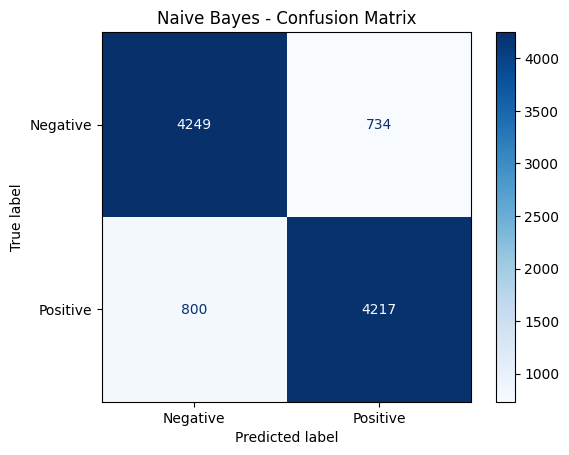

Naive Bayes - Classification Report
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85      4983
    Positive       0.85      0.84      0.85      5017

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_true_nb, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

# Classification Report
print("Naive Bayes - Classification Report")
print(classification_report(y_true_nb, y_pred_nb, target_names=['Negative', 'Positive']))

